# Reading Dataset


In [3]:
#we are using pandas library to read our dataset
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')
#read_csv function of pandas library reads the csv (comma separated values) file 

# Exploring Dataset


In [4]:
data.head()
#head function returns the first 5 rows of dataset
#we got 5 columns in this dataset in which it specifies the details of each customer like its age,gender,annual income in K$ 
#and spending score in the mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()
#As you can see there are 4 integers and 1 object datatypes present and no null values
#so we dont have missing values in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()
#As you can see this is the description of our data which included count,mean,standard-deviation,minimum and maximum value 
#for each attribute 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visualization

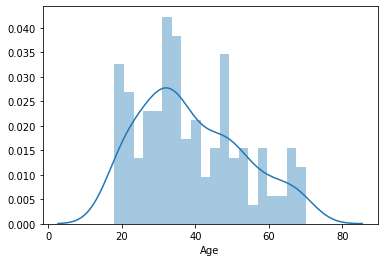

In [7]:
#seaborn library is used for data visualization
import seaborn as sns
sns.distplot(data['Age'],bins=20)
#Distplot used to plot univariate distribution.
#this distplot is showing the distribution of age in dataset
#as you can see age of around 20 to 50 are more in dataset 

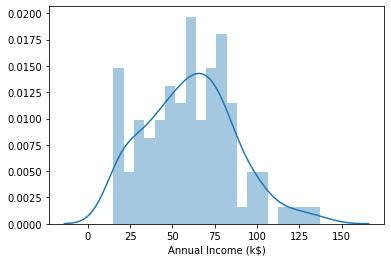

In [8]:
sns.distplot(data['Annual Income (k$)'],bins=20)
#this is the distribution plot for annual income in thousands of dollars .
#as you can see there are more people earning between 15K to 90K

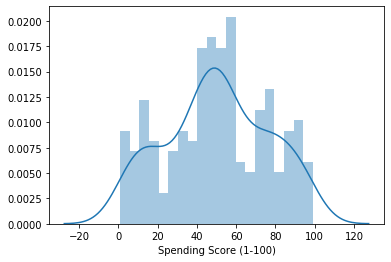

In [9]:
sns.distplot(data['Spending Score (1-100)'],bins=20)
#this is the distribution of spending score of customers,there are more customers in 40 to 60 points
#but we cant even neglect other range of spending score because that range is also showing significant number of customers

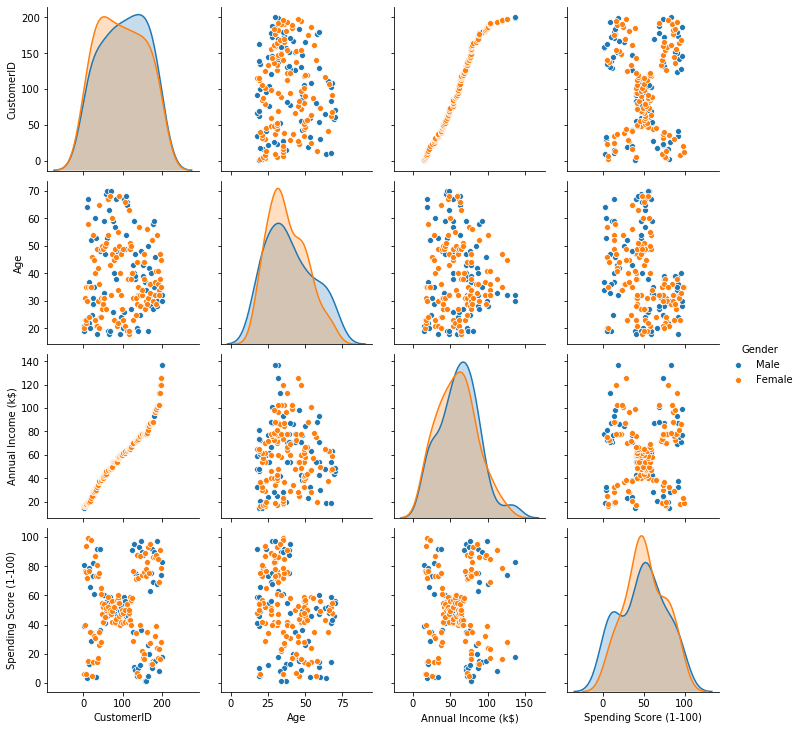

In [10]:
sns.pairplot(data,hue='Gender')
#this is the seaborn pairplot which plots the graph for each feature with all the features of the dataset
#we used the hue parameter as gender ,this will select unique values in gender and plot the graph with respect to that unique 
#values
#as we can see we got two unique elements in gender feature as male and female, on basis of these two elements the graph is 
#plotted
#in here red is for female and blue is for male
#first conclusion - as you can see more red dots then blue dots everywhere in the graph,which shows females spends more than
#men in this dataset of mall customers
#second conclusion - if you see the age vs Spending score graph,you will notice that the people of 15 to 55 years of age are 
#spending more than other ages
#third conclusion - if you see annual income vs spending score graph,womens who earn in between 45K to 70K are mostly spending 
#in between 40 to 60 score 


# KMeans Clustering

In [11]:
#Clustering is to form groups in dataset such that data of all same features come in same groups.
#Select all combinations of features 
#1-Age and Spending-score
#2-Annual-income and Spending-score
#3-Age,Annual-income and Spending-score
#Find the optimal number of clusters by elbow point

In [12]:
#we are using sklearn library for modelling the kmeans clustering model
#first we are going to predict with respect to age and spending score and try to find out some conclusion
from sklearn.cluster import KMeans
#getting age and spending score out of dataset in new variable data1
data1=data[['Age','Spending Score (1-100)']].values
#error list will contain all the inertia value of different number of clusters, this will help to get the elbow point which 
#help to get the optimal number of clusters
#less the inertia more the dense your cluster
error=[]
for n in range(1,10):
    model=KMeans(n_clusters=n,init='k-means++',tol=0.0001)
    model.fit(data1)
    error.append(model.inertia_)
error
#these are the inertia values of 1 to 9 number of clusters

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23829.93187994801,
 19620.084771357673,
 15514.19313435103,
 13054.172145982673,
 11453.718049229354]

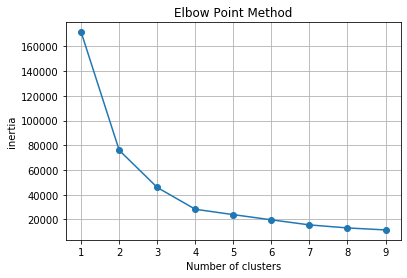

In [13]:
#matplotlib library is also used for plotting graphs
import matplotlib.pyplot as plt
plt.plot(range(1,10),error,marker='o',linestyle='-')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.title('Elbow Point Method')
plt.show()

In [14]:
#As you can see in above graph after 4, the change in graph is actually very less so this is the elbow point  
#Less the inertia more the dense your cluster ,so this is the optimal number of clusters

In [15]:
#preparing model with KMeans method wth various parameter like n_clusters which specifies number of clusters ,init in which i 
#initialized with k-means++ which selects the initial centroids in such a way to fasten up convergence,tol is the tolerance 
model1=KMeans(n_clusters=4,init='k-means++',tol=0.0001)
#fit_predict method form the clusters and also returns the cluster index
predict=model1.fit_predict(data1)
#this is my predicted output,as number of cluster is 4 and they are indexed as 0,1,2 and 3 . 
#so my first datapoint lies in cluster 0 and so on...
predict

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

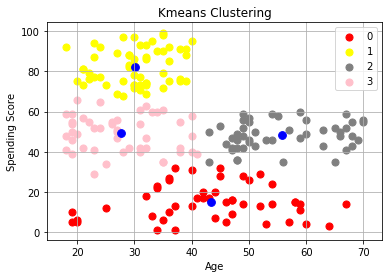

In [16]:
#now i am plotting the clusters with it index and using matplotlib to plot
plt.scatter(data1[predict == 0, 0], data1[predict == 0, 1], s = 50, c = 'red', label = '0')
plt.scatter(data1[predict == 1, 0], data1[predict == 1, 1], s = 50, c = 'yellow', label = '1')
plt.scatter(data1[predict == 2, 0], data1[predict == 2, 1], s = 50, c = 'grey', label = '2')
plt.scatter(data1[predict == 3, 0], data1[predict == 3, 1], s = 50, c = 'pink', label = '3')
#cluster_centers_ will give me all centers of all clusters 
center=model1.cluster_centers_
#all blue color dots are the centroids of all clusters
plt.scatter(x=center[:,0],y=center[:,1],s=60,c='blue')
plt.grid()
#this is to specify x and y labels
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Kmeans Clustering')
#legend method is used to show the label which are specified in scatter method
plt.legend()
#show method to show the plot
plt.show()
#now if you see people of age 40 and lesser comes in all ranges of spending score
#and above 40 years people shop between 0 to 60 
#Conclusion - cluster 1 will be your customers who spends a lot and you dont want to lose them 
#Conclusion -cluster 2 and 3 will be the customers who spends around 40 to 60 but you can target these customers to make 
# them spend more
#conclusion -cluster 0 will be the normal customers who spends less than others

In [17]:
#now we  will apply clustering on annual income and spending score and try to get some important information out of it
#getting annual income and spending score from original dataset to a new variable
data2=data[['Annual Income (k$)','Spending Score (1-100)']].values
#error1 list will contains the inertia values of all clusters ,this will help in plotting graph which eventually help in
#finding the optimal number of clusters
error1=[]
for n in range(1,10):
    model2=KMeans(n_clusters=n,init='k-means++',tol=0.0001)
    model2.fit(data2)
    error1.append(model2.inertia_)
error1    

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30273.394312070042,
 25044.967764018926,
 22856.45429537046]

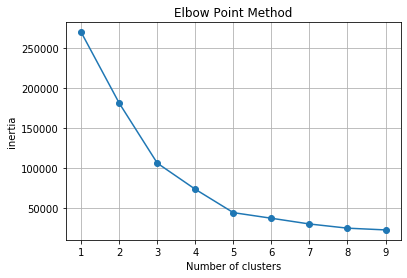

In [18]:
#now we have to plot the graph for elbow point method to find the optimal number of clusters
plt.plot(range(1,10),error1,marker='o',linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.title('Elbow Point Method')
plt.grid()
plt.show()
#as you can see after 5 there is not much difference in line, so 5 is the optimal number of clusters 

In [19]:
#now we are going to fit and predict the model and then plot our clusters and try to get some information out of it
model3=KMeans(n_clusters=5,init='k-means++',tol=0.0001)
predict1=model3.fit_predict(data2)
predict1
#as there are 5 clusters you can see cluster index as 0,1,2,3 and 4, now we will plot them to get some informatin out of it

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3,
       4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

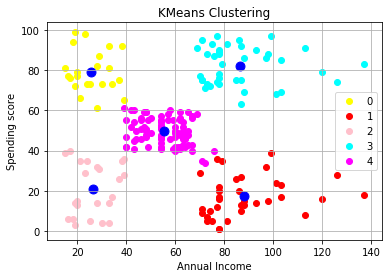

In [20]:
plt.scatter(data2[predict1==0,0],data2[predict1==0,1],c='yellow',label='0')
plt.scatter(data2[predict1==1,0],data2[predict1==1,1],c='red',label='1')
plt.scatter(data2[predict1==2,0],data2[predict1==2,1],c='pink',label='2')
plt.scatter(data2[predict1==3,0],data2[predict1==3,1],c='cyan',label='3')
plt.scatter(data2[predict1==4,0],data2[predict1==4,1],c='magenta',label='4')
center1=model3.cluster_centers_
plt.scatter(center1[:,0],center1[:,1],s=80,c='blue')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('KMeans Clustering')
plt.grid()
plt.show()

In [19]:
#now by seeing plot the customers of cluster 0 and 3 are premium customers which you dont want to lose in any condition
#cluster 4 will be your target customers and you want them to spend more
#cluster 2 and 1 are your usual customer ,and they are important because annually they can make a difference in sales but 
#your buisness strategy should not wholly depend on them
#but we can actually target cluster 3 people because as they are earning more than 75K and some are even crossing 100K

In [21]:
#now we are going to select all three parameters- age , annual income and spending score and try to get out some conclusion
#create a new parameter for my new array of values
data3=data[['Age','Annual Income (k$)','Spending Score (1-100)']].values
data3

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [22]:
#apply same procedure to get the optimal number of clusters
error2=[]
for i in range(1,10):
    model3=KMeans(n_clusters=i,init='k-means++',tol=0.0001)
    model3.fit(data3)
    error=model3.inertia_
    error2.append(error)
error2    

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51098.58740856844,
 44307.87341670445,
 41236.418685624725]

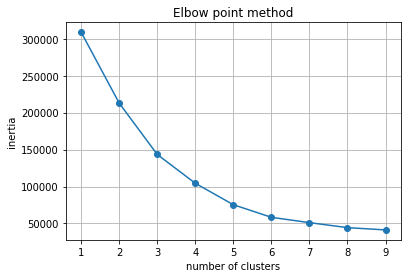

In [23]:
plt.plot(range(1,10),error2,marker='o',linestyle='-')
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('Elbow point method')
plt.show()

In [24]:
#as you can see there is no much difference after 6 , 6 is our optimal number of cluster
model4=KMeans(n_clusters=6,init='k-means++',tol=0.0001)
predict2=model4.fit_predict(data3)
predict2

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 0, 3,
       2, 5, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [25]:
import ipyvolume as ipv
import numpy as np
x=np.array(data3[predict2==0,0])
x=x.astype(float)
y=np.array(data3[predict2==0,1])
y=y.astype(float)
z=np.array(data3[predict2==0,2])
z=z.astype(float)
ipv.scatter(x,y,z,marker='sphere',color='yellow')

x=np.array(data3[predict2==1,0])
x=x.astype(float)
y=np.array(data3[predict2==1,1])
y=y.astype(float)
z=np.array(data3[predict2==1,2])
z=z.astype(float)
ipv.scatter(x,y,z,marker='sphere',color='red')

x=np.array(data3[predict2==2,0])
x=x.astype(float)
y=np.array(data3[predict2==2,1])
y=y.astype(float)
z=np.array(data3[predict2==2,2])
z=z.astype(float)
ipv.scatter(x,y,z,marker='sphere',color='blue')

x=np.array(data3[predict2==3,0])
x=x.astype(float)
y=np.array(data3[predict2==3,1])
y=y.astype(float)
z=np.array(data3[predict2==3,2])
z=z.astype(float)
ipv.scatter(x,y,z,marker='sphere',color='pink')

x=np.array(data3[predict2==4,0])
x=x.astype(float)
y=np.array(data3[predict2==4,1])
y=y.astype(float)
z=np.array(data3[predict2==4,2])
z=z.astype(float)
ipv.scatter(x,y,z,marker='sphere',color='cyan')

x=np.array(data3[predict2==5,0])
x=x.astype(float)
y=np.array(data3[predict2==5,1])
y=y.astype(float)
z=np.array(data3[predict2==5,2])
z=z.astype(float)
ipv.scatter(x,y,z,marker='sphere',color='orange')

ipv.xlabel('age')
ipv.ylabel('annual income')
ipv.zlabel('spending score')
ipv.show()

In [ ]:
'''Conclusion:-
   yellow is your 0th cluster and they can be your potential customers and most of the customers in this cluster are of age 
   above 40 and there annual income is around 40k to 70k and there spending score is also in mid range of 40 to 60
   
   red is your 1st cluster and they are your premium customers and these customers are of age around 30 to 50 and 
   there annual income is more than 70k and there spending score is above 60 , so you dont want to lose these type of customers
   
    blue is your 2nd cluster and these are usual customers because there age varies from 20 to 70 and there annual income is 
   less than 40 and there spending score is also less than 40
   
   pink is your 3rd cluster and are similar to 1st cluster except customers in here are young, so they can be potential  
   customer too
   
   cyan is your 4th cluster and these people also can be your targeted customer because they are of age between 20 to 70 and 
   there annual income is more than 80k but most of these customers spending score is below than 40
   
   orange is your 5th cluster and these are shopping lovers because there annual income is less than 50k and there spending score 
   is more than 60 and there age is around 20 to 40
   
   with these conclusions you can make buisness strategies to boost spending score of your customers
'''   